<a href="https://colab.research.google.com/github/Hong-Soonbin/kaggle_competition/blob/main/kaggle_Tabular_Playground_Series/Aug_2022/Tabular_Playground_Series_Aug_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
%matplotlib inline
mpl.rc('font', size = 15)
import scipy

import numpy as np
import pandas as pd

import os
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#메모리관리
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
#피처요약표
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터타입']) #.sort_values()
    #summary = summary.reset_index()
    #summary = summary.rename(columns = {'index':'피처'})

    #summary['결측치 개수'] = df.isnull().sum().values #결측치가 존재하지 않더라도 -1같은 값으로 있는 경우가 있으니 확인 필요!
    
    summary['결측치 개수'] = (df == -1).sum().values # 피처별 -1 개수

    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    return summary

In [ ]:
path = '/content/drive/MyDrive/data/tabular-playground-series-aug-2022'

files = glob.glob(path + '/*.csv')
for file in files:
    if 'train' in file:
        train = pd.read_csv(file,index_col='id')
    elif 'test' in file:
        test = pd.read_csv(file,index_col='id')
    elif 'sample' in file:
        sub = pd.read_csv(file)
train = downcast(train)
test = downcast(test)

train.shape, test.shape, sub.shape

51.0% 압축됨
49.5% 압축됨


((26570, 25), (20775, 24), (20775, 2))

In [ ]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100

        ax.text(x = left_coord + width / 2.0,
                y = height + total_size * 0.001,
                s = f'{percent:1.1f}%',
                ha = 'center')

#EDA

This data represents the results of a large product testing study. For each product_code you are given a number of product attributes (fixed for the code) as well as a number of measurement values for each individual product, representing various lab testing methods. Each product is used in a simulated real-world environment experiment, and and absorbs a certain amount of fluid (loading) to see whether or not it fails.

Your task is to use the data to predict individual product failures of new codes with their individual lab test results.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float32
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int8   
 5   attribute_3     26570 non-null  int8   
 6   measurement_0   26570 non-null  int8   
 7   measurement_1   26570 non-null  int8   
 8   measurement_2   26570 non-null  int8   
 9   measurement_3   26189 non-null  float32
 10  measurement_4   26032 non-null  float32
 11  measurement_5   25894 non-null  float32
 12  measurement_6   25774 non-null  float32
 13  measurement_7   25633 non-null  float32
 14  measurement_8   25522 non-null  float32
 15  measurement_9   25343 non-null  float32
 16  measurement_10  25270 non-null  float32
 17  measurement_11  25102 non-null 

In [ ]:
train.isnull().sum()

product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [ ]:
train[train.isnull()] = np.NaN

In [ ]:
summary = resumetable(train)
summary

데이터셋 형상 : (26570, 25)


,데이터타입,결측치 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
product_code,object,0,5,A,A,A
loading,float32,0,11950,80.099998,84.889999,82.43
attribute_0,object,0,2,material_7,material_7,material_7
attribute_1,object,0,3,material_8,material_8,material_8
attribute_2,int8,0,4,9,9,9
attribute_3,int8,0,4,5,5,5
measurement_0,int8,0,29,7,14,12
measurement_1,int8,0,30,8,3,1
measurement_2,int8,0,25,4,3,5
measurement_3,float32,0,4721,18.040001,18.212999,18.056999


0 product_code
1 loading
2 attribute_0
3 attribute_1
4 attribute_2
5 attribute_3
6 measurement_0
7 measurement_1
8 measurement_2
9 measurement_3
10 measurement_4
11 measurement_5
12 measurement_6
13 measurement_7
14 measurement_8
15 measurement_9
16 measurement_10
17 measurement_11
18 measurement_12
19 measurement_13
20 measurement_14
21 measurement_15
22 measurement_16
23 measurement_17


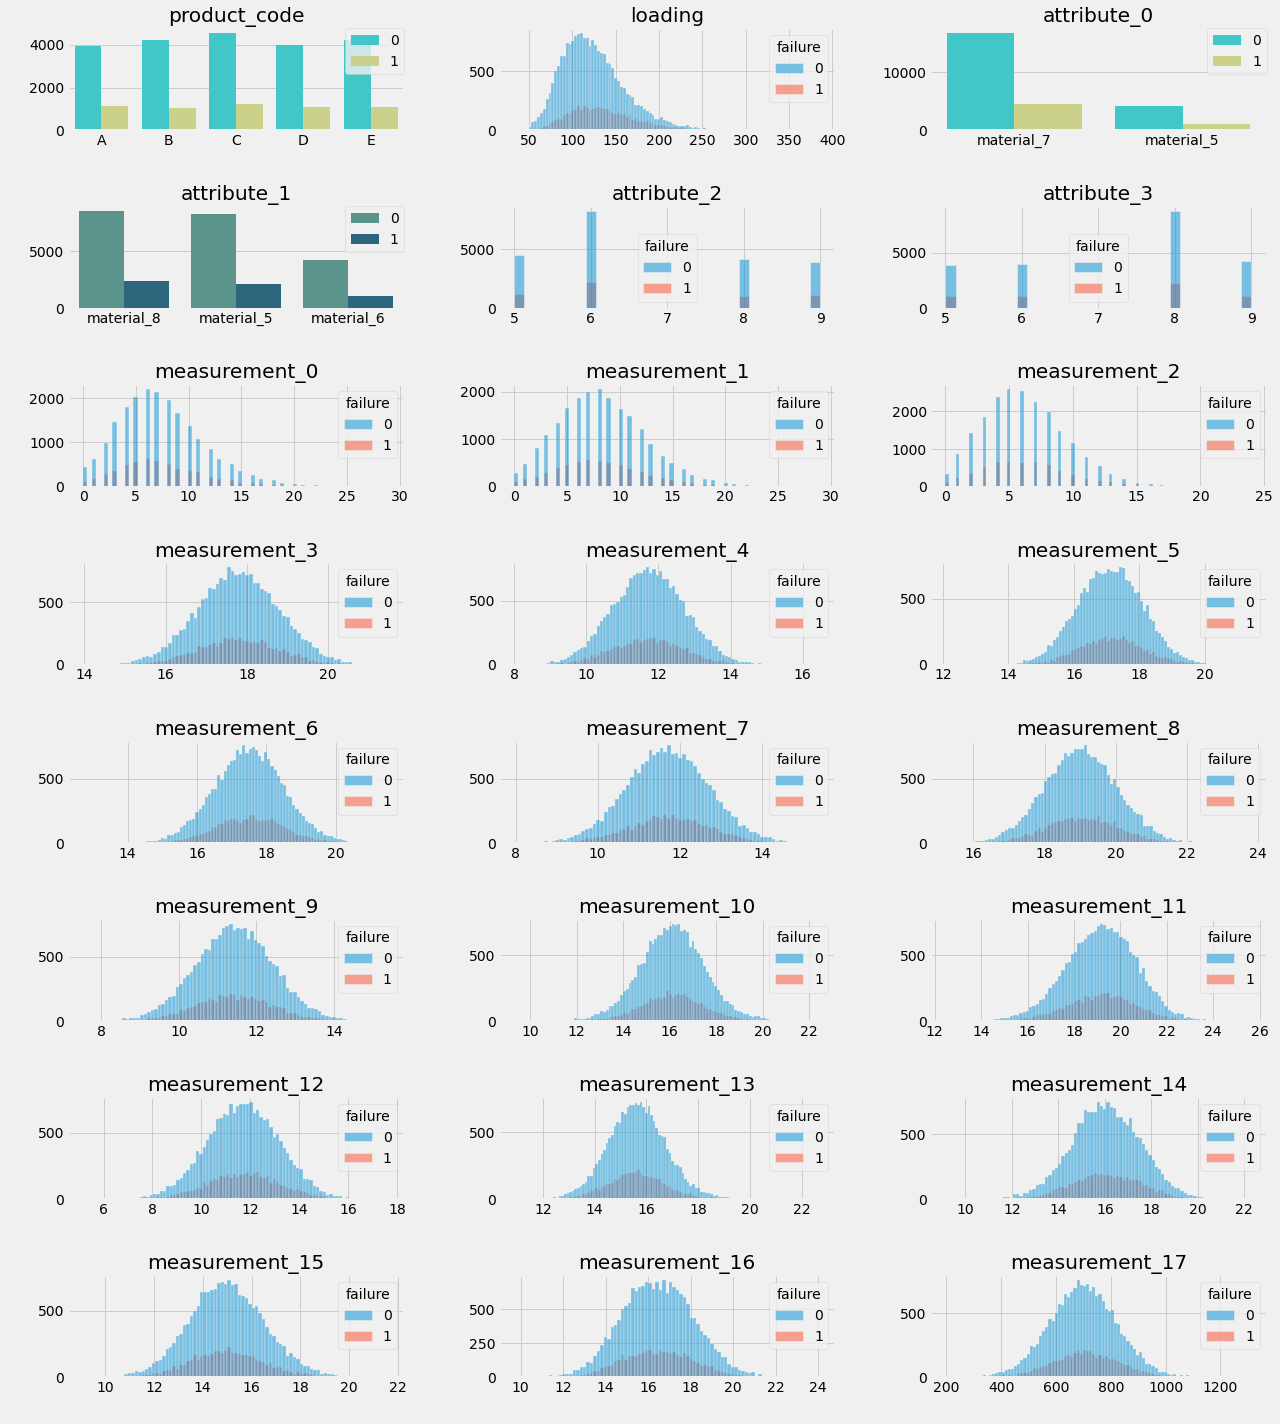

In [ ]:
import random
plt.style.use("fivethirtyeight")
useful_cols=[col for col in train.columns if col not in ["id","failure"]]
cols_dist = [col for col in useful_cols if train[col].dtypes not in ['object']]
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
cmap_ = ['mako', 'rainbow', 'crest']

plt.figure(figsize= (18,20))
for i,col in enumerate(train[useful_cols].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(8,3, i+1)
    if col in cols_dist:
        
        sns.histplot(data=train,x=train[col],hue=train['failure'], color = rand_col, fill = rand_col)
        plt.title(col, color = 'black')
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
    else:
        sns.countplot(data = train , x = col, hue=train['failure'], palette = cmap_[random.sample(range(3), 1)[0]] )
        plt.title(col, color = 'black')
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.legend(loc='upper right', borderaxespad=0)
        plt.tight_layout()

In [ ]:
train.nunique()

product_code          5
loading           11950
attribute_0           2
attribute_1           3
attribute_2           4
attribute_3           4
measurement_0        29
measurement_1        30
measurement_2        25
measurement_3      4721
measurement_4      4692
measurement_5      4671
measurement_6      4704
measurement_7      4734
measurement_8      4713
measurement_9      4708
measurement_10     6177
measurement_11     6526
measurement_12     6392
measurement_13     5271
measurement_14     6389
measurement_15     6577
measurement_16     7035
measurement_17    23612
failure               2
dtype: int64

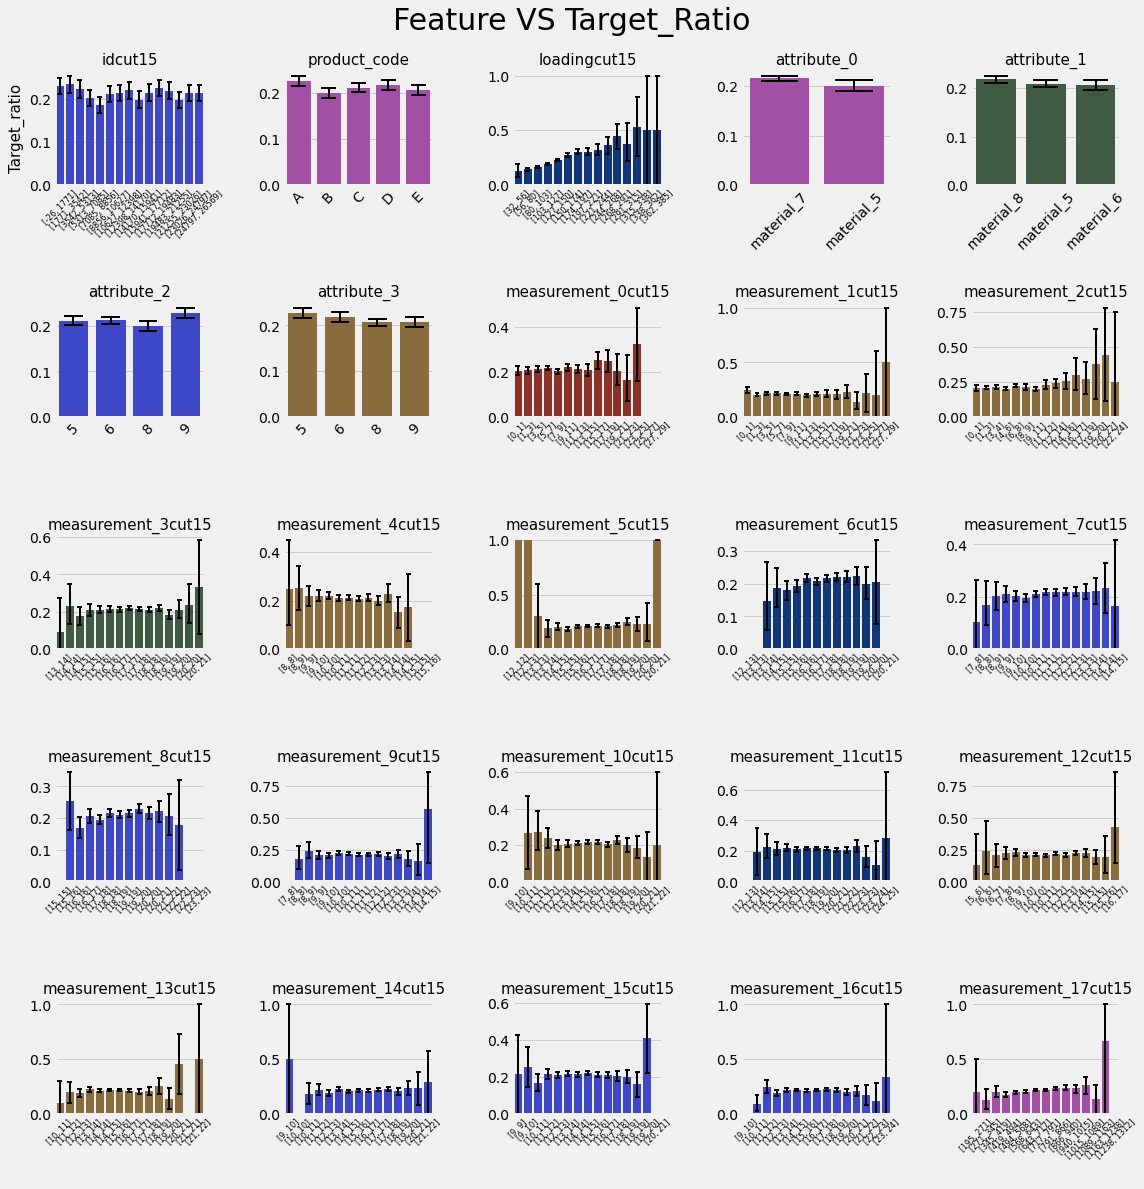

In [ ]:
import random
plt.style.use("fivethirtyeight")
useful_cols=[col for col in train.columns if col != 'failure']
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
cmap_ = ['mako', 'rainbow', 'crest']
first_ax = True

cut=15

plt.figure(figsize= (16,16))
for i,col in enumerate(train[useful_cols].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(5,5, i+1)

    if train[col].nunique() > 20:
        tmp = pd.cut(train[col], cut)
        label = sorted([([int(i.left),int(i.right)]) for i in tmp.unique() if not type(i) == float],key = lambda x : (x[0],x[1]))
        sns.barplot(data=train,x=tmp,y=train['failure'], errwidth=2, capsize=0.5,
                    color = rand_col,errcolor='black', fill = rand_col)
        plt.xticks([i for i in range(len(label))], label, rotation=45,fontsize=8)
        plt.title(col+f'cut{str(cut)}', color = 'black',fontsize=15)
    else:
        sns.barplot(data=train,x=train[col],y=train['failure'], errwidth=2, capsize=0.5,
            color = rand_col,errcolor='black', fill = rand_col)
        plt.title(col, color = 'black',fontsize=15)
        plt.xticks(rotation=45)


    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout(pad=0.8)
    if first_ax:
        plt.ylabel("Target_ratio",fontsize=15)
        first_ax = False
plt.suptitle('Feature VS Target_Ratio',fontsize=30,y=1.03)
plt.show()

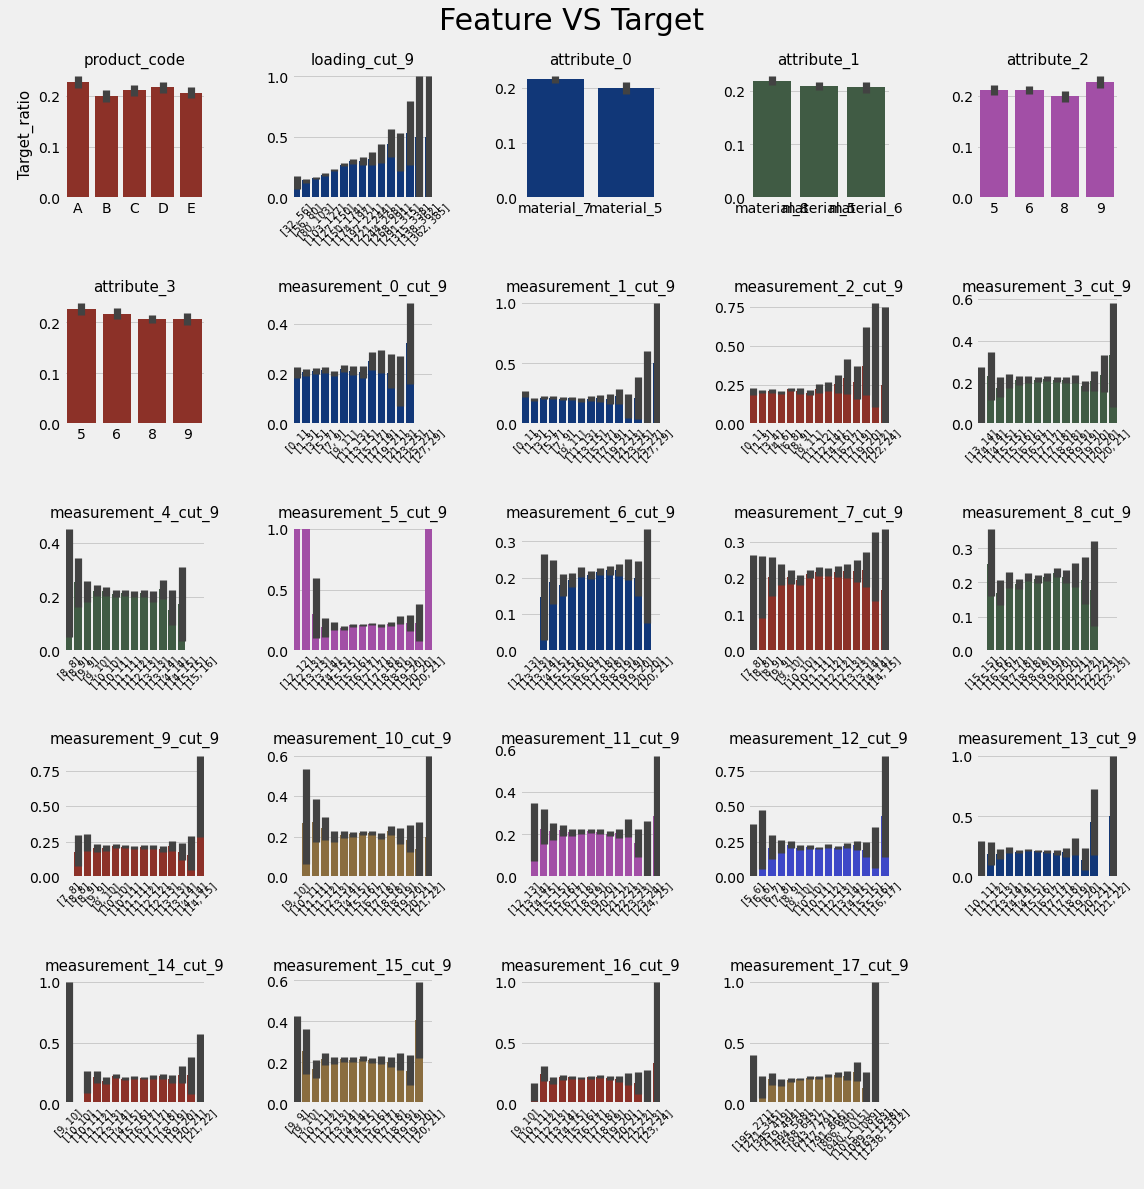

In [ ]:
import random
plt.style.use("fivethirtyeight")
useful_cols=[col for col in train.columns if col not in ["id","failure"]]
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
cmap_ = ['mako', 'rainbow', 'crest']
first_ax = True


plt.figure(figsize= (16,16))
for i,col in enumerate(train[useful_cols].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(5,5, i+1)

    if train[col].nunique() > 20:
        tmp = pd.cut(train[col], 15)
        sns.barplot(data=train,x=tmp,y=train['failure'], color = rand_col, fill = rand_col)
        label = sorted([([int(i.left),int(i.right)]) for i in tmp.unique() if not type(i) == float],key = lambda x : (x[0],x[1]))
        plt.xticks([i for i in range(len(label))], label, rotation=45,fontsize=10)
        plt.title(col+'_cut_9', color = 'black',fontsize=15)
    else:
        sns.barplot(data=train,x=train[col],y=train['failure'], color = rand_col, fill = rand_col)
        plt.title(col, color = 'black',fontsize=15)

    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout(pad=0.8)
    if first_ax:
        plt.ylabel("Target_ratio",fontsize=15)
        first_ax = False
plt.suptitle('Feature VS Target',fontsize=30,y=1.03)
plt.show()

In [ ]:
train.nunique()

product_code          5
loading           11950
attribute_0           2
attribute_1           3
attribute_2           4
attribute_3           4
measurement_0        29
measurement_1        30
measurement_2        25
measurement_3      4721
measurement_4      4692
measurement_5      4671
measurement_6      4704
measurement_7      4734
measurement_8      4713
measurement_9      4708
measurement_10     6177
measurement_11     6526
measurement_12     6392
measurement_13     5271
measurement_14     6389
measurement_15     6577
measurement_16     7035
measurement_17    23612
failure               2
dtype: int64

In [ ]:
train.measurement_7.describe()

count    25633.000000
mean        11.716624
std          1.000836
min          7.968000
25%         11.045000
50%         11.712000
75%         12.391000
max         15.419000
Name: measurement_7, dtype: float64

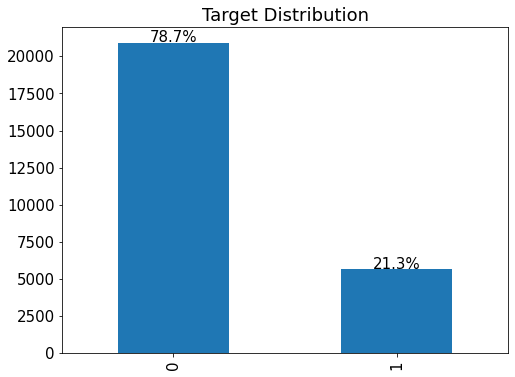

In [ ]:
#타겟 비율
plt.figure(figsize=(8,6))
ax = train['failure'].value_counts().plot.bar()
ax.set_title('Target Distribution')
write_percent(ax,len(train))   

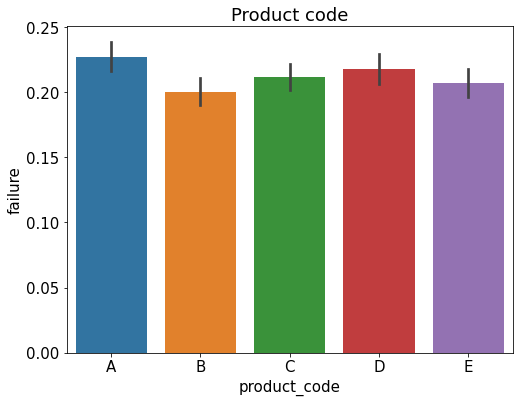

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='product_code' ,y='failure' ,data=train)
plt.title('Product code')
plt.show()

고윳값별 타겟값 비율이 모두 비슷해 학습에 크게 도움이 될지 모르겠다.

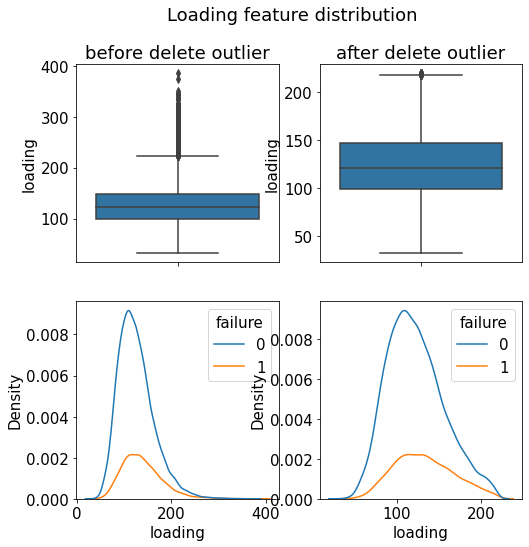

In [ ]:
f,ax = plt.subplots(2,2)
f.set_size_inches((8,8))
sns.boxplot(y='loading', data=train, ax=ax[0,0])
ax[0,0].set_title('before delete outlier')
sns.boxplot(y='loading', data=train[train.loading < 220], ax=ax[0,1])
ax[0,1].set_title('after delete outlier')

sns.kdeplot(x='loading',hue='failure',data=train,ax=ax[1,0])

sns.kdeplot(x='loading',hue='failure',data=train[train.loading < 220],ax=ax[1,1])

plt.suptitle('Loading feature distribution')
plt.show()

이상치 비율이 2.45% 정도인데 타겟 예측에 도움이 될 지는 학습해봐야겠다.

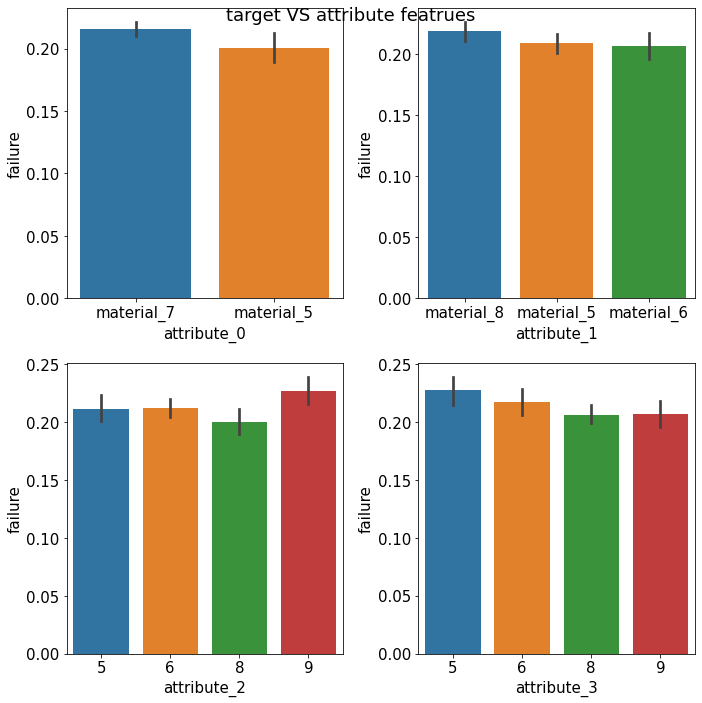

In [ ]:
f,ax = plt.subplots(2,2)
f.set_size_inches((10,10))
sns.barplot(x='attribute_0' ,y='failure' ,data=train,ax=ax[0,0])

sns.barplot(x='attribute_1' ,y='failure' ,data=train,ax=ax[0,1])

sns.barplot(x='attribute_2' ,y='failure' ,data=train,ax=ax[1,0])

sns.barplot(x='attribute_3' ,y='failure' ,data=train,ax=ax[1,1])

plt.suptitle('target VS attribute featrues')

plt.tight_layout()
plt.show()

attribution 피처들 역시 고윳값별 타겟 비율이 곂쳐 유의미한 피처라고 판단하기 어렵다

In [ ]:
df = train.copy()

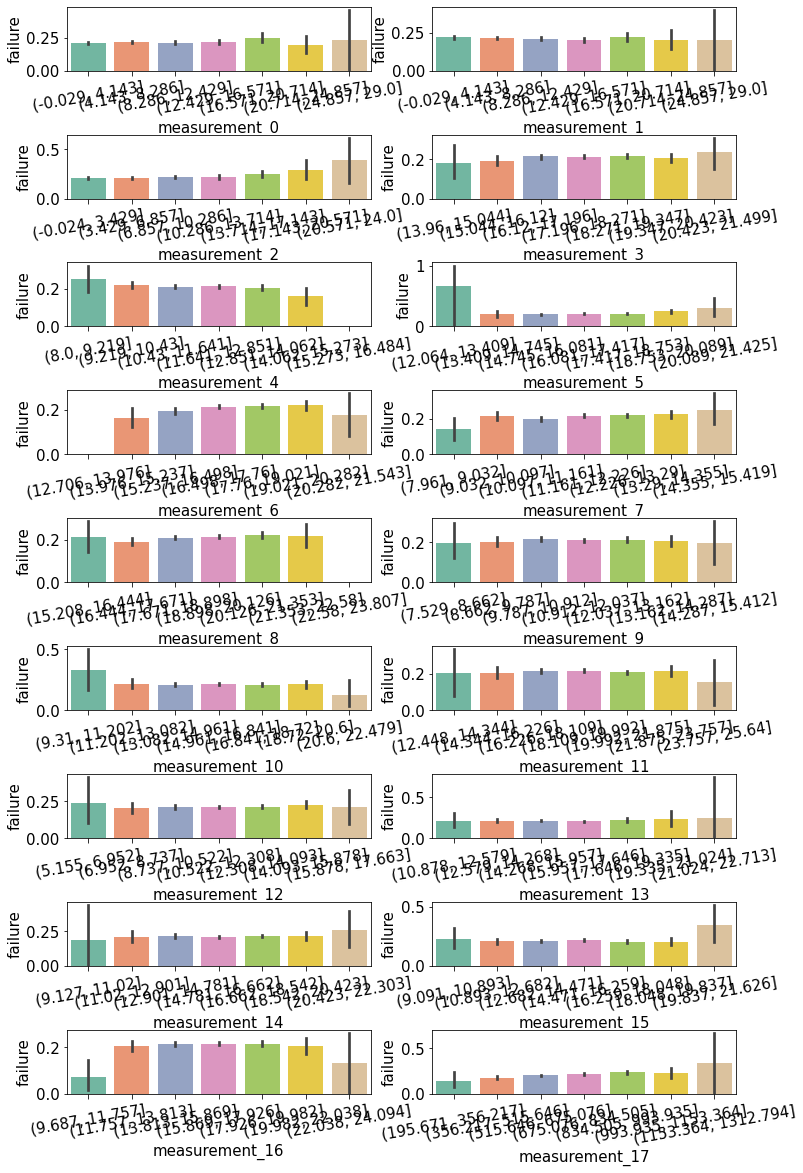

In [ ]:
train = df.copy()
msm_features = [i for i in train.columns if 'measurement' in i]

plt.figure(figsize=(12, 20))                # Figure 크기 설정
grid = gridspec.GridSpec(9,2)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=1) # 서브플롯 간 여백 설정

for idx, msm_feature in enumerate(msm_features):
    # 값을 5개 구간으로 나누기
    train[msm_feature] = pd.cut(train[msm_feature], 7)

    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.barplot(x=msm_feature, y='failure', data=train, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10,size=5) # x축 라벨 회전

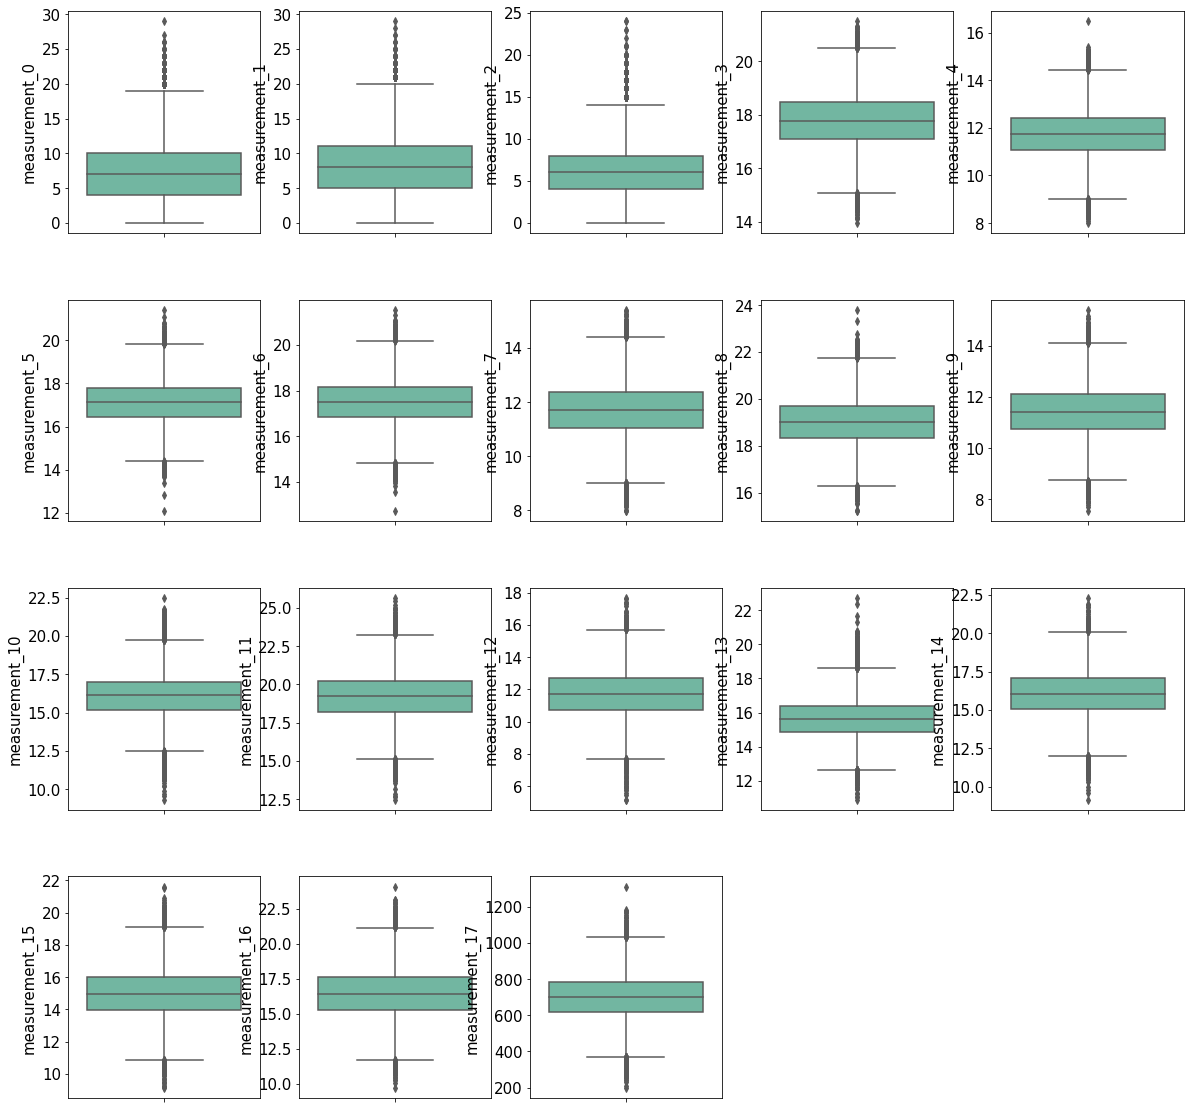

In [ ]:
train = df.copy()
msm_features = [i for i in train.columns if 'measurement' in i]

plt.figure(figsize=(20, 20))                # Figure 크기 설정
grid = gridspec.GridSpec(4,5)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.3) # 서브플롯 간 여백 설정

for idx, msm_feature in enumerate(msm_features):
    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.boxplot(y=msm_feature, data=train, palette='Set2', ax=ax)

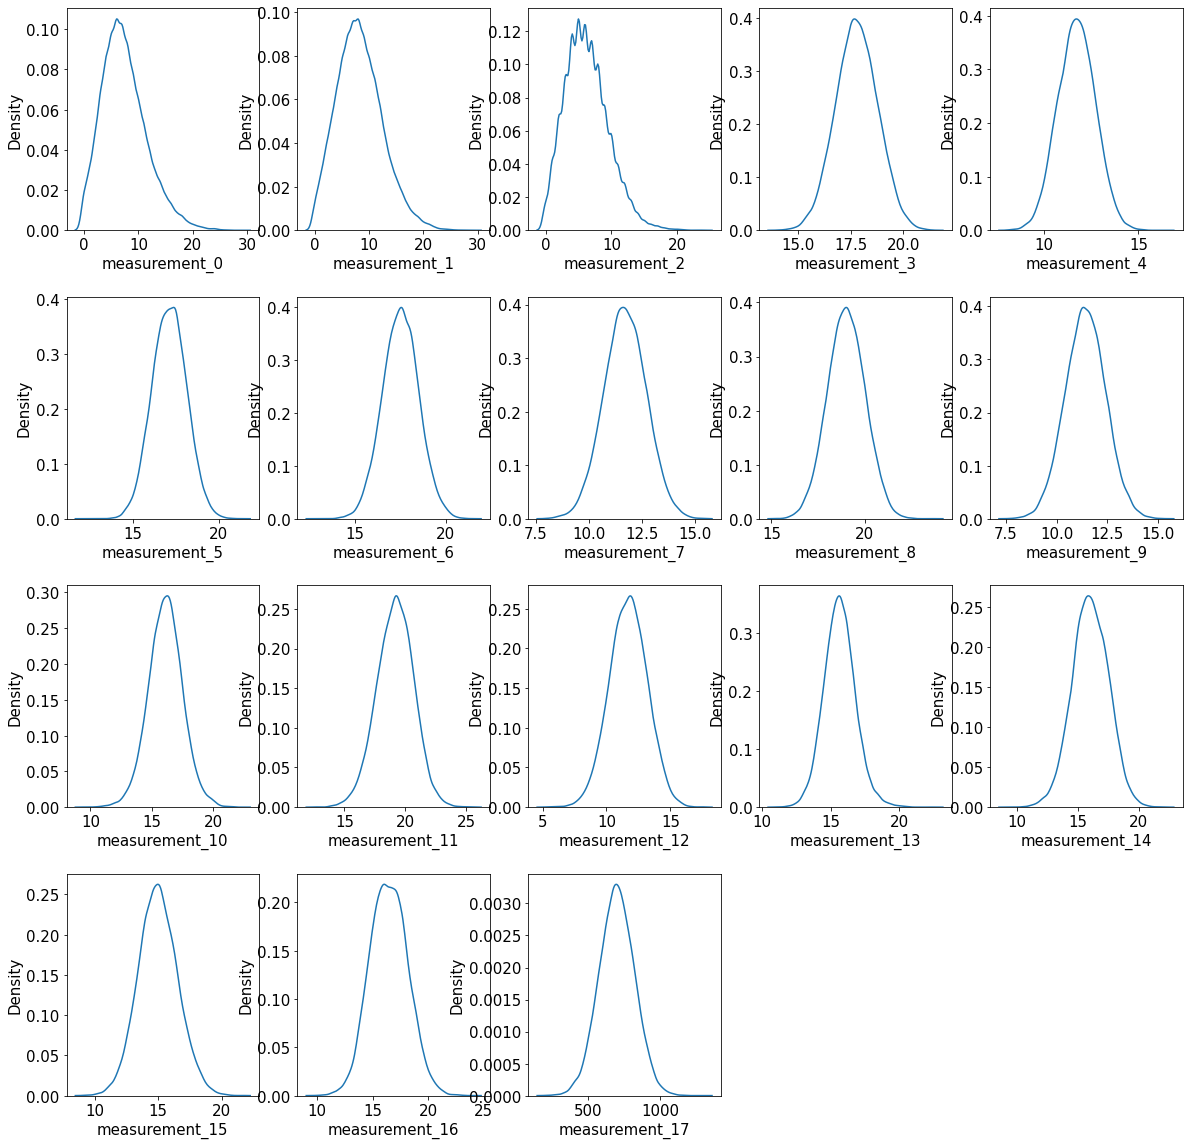

In [ ]:
train = df.copy()
msm_features = [i for i in train.columns if 'measurement' in i]

plt.figure(figsize=(20, 20))                # Figure 크기 설정
grid = gridspec.GridSpec(4,5)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.3) # 서브플롯 간 여백 설정

for idx, msm_feature in enumerate(msm_features):
    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.kdeplot(x=msm_feature, data=train, palette='Set2', ax=ax)

In [ ]:
summary[summary['데이터타입'] == 'float32'].index

Index(['loading', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')

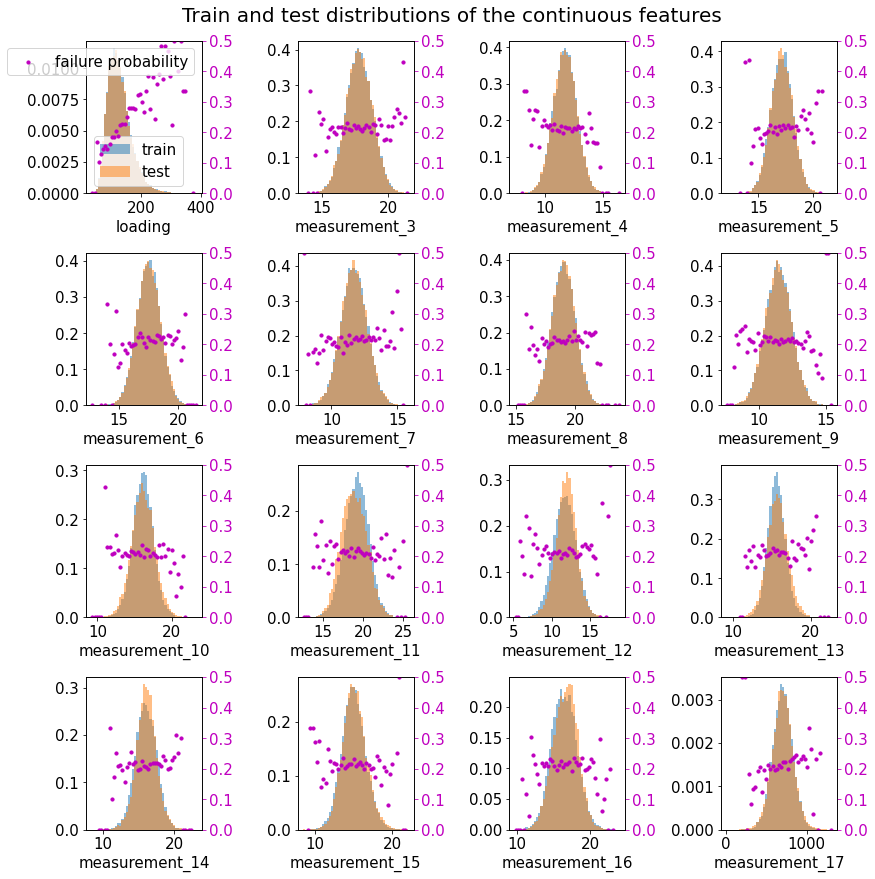

In [ ]:
import warnings

float_cols = summary[summary['데이터타입'] == 'float32'].index

plt.figure(figsize=(12, 12))                # Figure 크기 설정
grid = gridspec.GridSpec(4,4)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.3) # 서브플롯 간 여백 설정

ax_first = True

for idx, f in enumerate(float_cols):
    ax = plt.subplot(grid[idx])
    mi = min(train[f].min(), test[f].min())
    ma = max(train[f].max(), test[f].max())
    bins = np.linspace(mi, ma, 50)
    ax.hist(train[f], bins=bins, alpha=0.5, density=True, label='train')
    ax.hist(test[f], bins=bins, alpha=0.5, density=True, label='test')
    ax.set_xlabel(f)
    if ax_first:
         ax.legend(loc='lower left')
        
    ax2 = ax.twinx()
    total, _ = np.histogram(train[f], bins=bins)
    failures, _ = np.histogram(train[f][train.failure == 1], bins=bins)
    with warnings.catch_warnings(): # ignore divide by zero for empty bins
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        ax2.scatter((bins[1:] + bins[:-1]) / 2, failures / total,
                    color='m', s=10, label='failure probability')
    ax2.set_ylim(0, 0.5)
    ax2.tick_params(axis='y', colors='m')
    if ax_first:
        ax2.legend(loc='upper right')
        ax_first = False

plt.tight_layout(w_pad=1)
plt.suptitle('Train and test distributions of the continuous features', fontsize=20, y=1.02)
plt.show()

feature           fail   miss   failure rate       z    p-value
loading         :   44 /  250 = 0.176          -1.41      0.157
measurement_3   :   61 /  381 = 0.160          -2.50      0.012
measurement_4   :  128 /  538 = 0.238           1.43      0.151
measurement_5   :  172 /  676 = 0.254           2.66      0.008
measurement_6   :  171 /  796 = 0.215           0.15      0.879
measurement_7   :  197 /  937 = 0.210          -0.18      0.860
measurement_8   :  218 / 1048 = 0.208          -0.36      0.716
measurement_9   :  283 / 1227 = 0.231           1.54      0.123
measurement_10  :  277 / 1300 = 0.213           0.04      0.967
measurement_11  :  311 / 1468 = 0.212          -0.07      0.944
measurement_12  :  356 / 1601 = 0.222           0.95      0.340
measurement_13  :  373 / 1774 = 0.210          -0.24      0.809
measurement_14  :  413 / 1874 = 0.220           0.82      0.411
measurement_15  :  430 / 2009 = 0.214           0.16      0.876
measurement_16  :  436 / 2110 = 0.207   

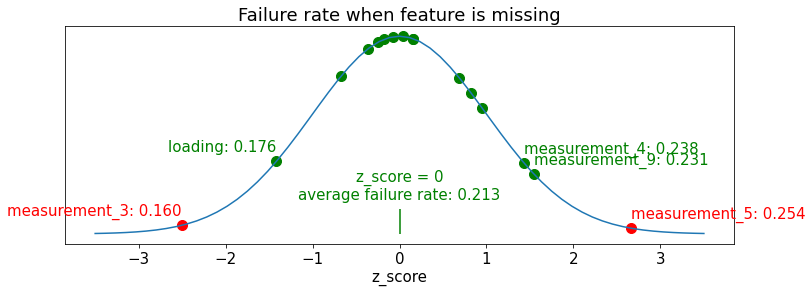

In [ ]:
# Start by plotting the bell curve
plt.figure(figsize=(12, 4))
z_ticks = np.linspace(-3.5, 3.5, 61)
pdf = scipy.stats.norm.pdf(z_ticks)
plt.plot(z_ticks, pdf)

# Calculate the conditional failure rate for every missing feature
# Print the values and plot them
print('feature           fail   miss   failure rate       z    p-value')
for f in train.columns:
    if train[f].isna().sum() > 0:
        total = train[f].isna().sum()
        fail = train[train[f].isna()].failure.sum()
        z = (fail / total - 0.212608) / (np.sqrt(0.212608 * (1-0.212608)) / np.sqrt(total))
        plt.scatter([z], [scipy.stats.norm.pdf(z)], c='r' if abs(z) > 2 else 'g', s=100)
        print(f"{f:15} : {fail:4} / {total:4} = {fail/total:.3f}          {z:5.2f}      {2*scipy.stats.norm.cdf(-abs(z)):.3f}")
        if abs(z) > 1: plt.annotate(f"{f}: {fail / total:.3f}",
                                    (z, scipy.stats.norm.pdf(z)),
                                    xytext=(0,10), 
                                    textcoords='offset points', ha='left' if z > 0 else 'right',
                                    color='r' if abs(z) > 2 else 'g')
            
# Annotage the center (z=0)
plt.vlines([0], 0, 0.05, color='g')
plt.annotate(f"z_score = 0\naverage failure rate: {0.212608:.3f}",
                                    (0, 0.05),
                                    xytext=(0,10), 
                                    textcoords='offset points', ha='center',
                                    color='g')
plt.title('Failure rate when feature is missing')
plt.yticks([])
plt.xlabel('z_score')
plt.show()

가설 : 결측값의 유무가 타겟값의 확률에 영향을 끼친다.
결측값일때 타겟값일 확률 = failure / total
그냥 타겟값의 확률 = 0.213
zscore : 지금 값이 얼마나 흔한가?에 대한 지표
(결측값일때 타겟값일 확률 - 그냥 타겟값의 확률) / 표준편차 / n^0.5


시각화 해석 zscore를 통해서 지금 뽑은 값이 평균인지 계산해본다.<br>
zscore값은 지금 값이 얼마나 흔한가?에 대해서 설명한다. z값이 작을수록 흔하고 클수록 흔하지않다.<br>
위의 시각화는 지금 상황(결측치일때 타겟값이 1일 경우)이 얼마나 흔하니? 라는 질문을 가진다<br>
z값이 작을수록 값이 가진 의미는 '응 결측치일때 타겟값이 1인 경우는 결측치 상관없이 무작위로 뽑을때의 확률과 비슷해, 흔해 라는 의미이고'<br>
z값이 큰 경우는 '결측치일때 타겟값이 1인경우는 흔하지않아 따라서 결측치에 따라 값이 변해 => 결측치는 의미있는값이야!'라고 해석가능하다.

z score = (예측값 - 평균) / 표준편차<br>
하지만 여러 샘플 이 있고 해당 샘플 평균의 표준 편차( 표준 오차 )를 설명하려면 다음 z 점수 공식을 사용합니다.<br>
z score = (예측값 - 평균) / (표준편차/n**0.5)<br>
키190 평균키170 표준편차3.5 키가 정규분포를 따를 때평균키가 190인 50명의 표본을 찾을 확률<br>
(190 - 170) / (3.5 / 50^0.5)

표본추출이기 때문에 표준편차대신 표준 오차를 사용한다.

*따라서* measurement_3 measurement_5 피처는 결측값을 피처로 사용할만하다!

## 정수형 피처

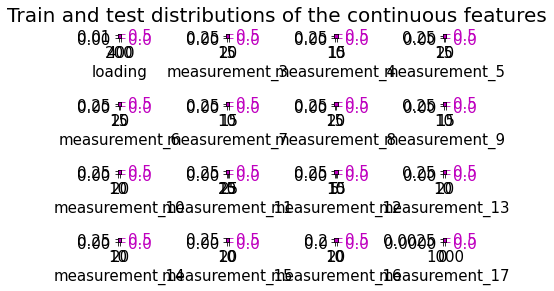

In [ ]:
for idx, f in enumerate(float_cols):
    ax = plt.subplot(grid[idx])
    mi = min(train[f].min(), test[f].min())
    ma = max(train[f].max(), test[f].max())
    bins = np.linspace(mi, ma, 50)
    ax.hist(train[f], bins=bins, alpha=0.5, density=True, label='train')
    ax.hist(test[f], bins=bins, alpha=0.5, density=True, label='test')
    ax.set_xlabel(f)
    if ax_first:
         ax.legend(loc='lower left')
        
    ax2 = ax.twinx()
    total, _ = np.histogram(train[f], bins=bins)
    failures, _ = np.histogram(train[f][train.failure == 1], bins=bins)
    with warnings.catch_warnings(): # ignore divide by zero for empty bins
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        ax2.scatter((bins[1:] + bins[:-1]) / 2, failures / total,
                    color='m', s=10, label='failure probability')
    ax2.set_ylim(0, 0.5)
    ax2.tick_params(axis='y', colors='m')
    if ax_first:
        ax2.legend(loc='upper right')
        ax_first = False

plt.tight_layout(w_pad=1)
plt.suptitle('Train and test distributions of the continuous features', fontsize=20, y=1.02)
plt.show()

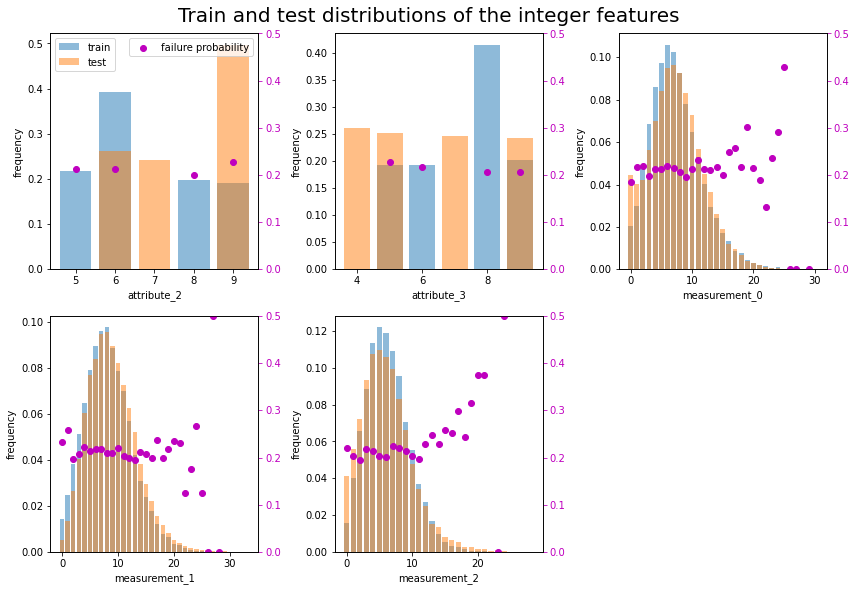

In [ ]:
int_cols = summary[summary['데이터타입'] == 'int8'][:-1].index

plt.figure(figsize=(12, 8))                # Figure 크기 설정
grid = gridspec.GridSpec(2, 3)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.3) # 서브플롯 간 여백 설정
mpl.rc('font', size = 10)

ax_first = True

for idx, f in enumerate(int_cols):
    ax = plt.subplot(grid[idx])

    temp1 = train.failure.groupby(train[f]).agg(['mean', 'size'])
    ax.bar(temp1.index, temp1['size'] / len(train), alpha=0.5, label='train')
    temp2 = test[f].value_counts()
    ax.bar(temp2.index, temp2 / len(test), alpha=0.5, label='test')
    ax.set_xlabel(f)
    ax.set_ylabel('frequency')

    ax2 = ax.twinx()
    ax2.scatter(temp1.index, temp1['mean'],
                color='m', label='failure probability')
    ax2.set_ylim(0, 0.5)
    ax2.tick_params(axis='y', colors='m')
    if ax_first:
        ax.legend()
        ax2.legend(loc='upper right')
        ax_first = False

#axs[1, 2].axis('off')
plt.tight_layout(w_pad=1)
plt.suptitle('Train and test distributions of the integer features', fontsize=20, y=1.02)
plt.show()

insight<br>
1. attribute_2,3에는 train test에 서로 존재하지 않는 값이 존재한다. ex)attribute_2 5,8값 7값 따라서 범주형 피처일 수 있다.
2. measurement_2는 10이상의 값에서 선형관계를 가진다.

##string columns

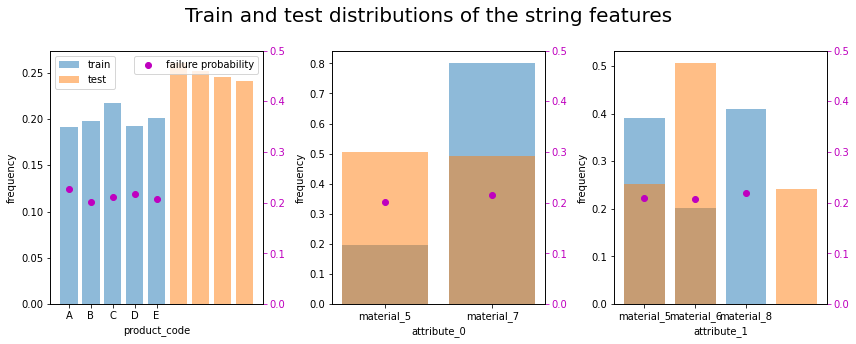

In [ ]:
obj_cols = summary[summary['데이터타입'] == 'object'].index


plt.figure(figsize=(12, 8))                # Figure 크기 설정
grid = gridspec.GridSpec(2, 3)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.3) # 서브플롯 간 여백 설정
mpl.rc('font', size = 10)

ax_first = True

for idx, f in enumerate(obj_cols):
    ax = plt.subplot(grid[idx])

    temp1 = train.failure.groupby(train[f]).agg(['mean', 'size'])
    ax.bar(temp1.index, temp1['size'] / len(train), alpha=0.5, label='train')
    temp2 = test[f].value_counts()
    ax.bar(temp2.index, temp2 / len(test), alpha=0.5, label='test')
    ax.set_xlabel(f)
    ax.set_ylabel('frequency')

    ax2 = ax.twinx()
    ax2.scatter(temp1.index, temp1['mean'],
                color='m', label='failure probability')
    ax2.set_ylim(0, 0.5)
    ax2.tick_params(axis='y', colors='m')
    if ax_first:
        ax.legend()
        ax2.legend(loc='upper right')
        ax_first = False

plt.suptitle('Train and test distributions of the string features', fontsize=20, y=1.05)
plt.tight_layout(w_pad=1)
plt.show()
del temp1, temp2   

train test각각 공통되지않는 값을 가지는 경우가 있다

In [ ]:
df['measurement_2'].clip(11, None).value_counts()
df['measurement_2'].value_counts()

5     3241
6     3155
4     3012
7     2892
8     2543
3     2350
9     1875
2     1749
10    1465
1     1071
11     985
12     714
13     452
0      418
14     258
15     147
16      91
17      67
18      37
19      19
20      16
21       8
23       2
24       2
22       1
Name: measurement_2, dtype: int64

##measeuremets 피처 상관관계

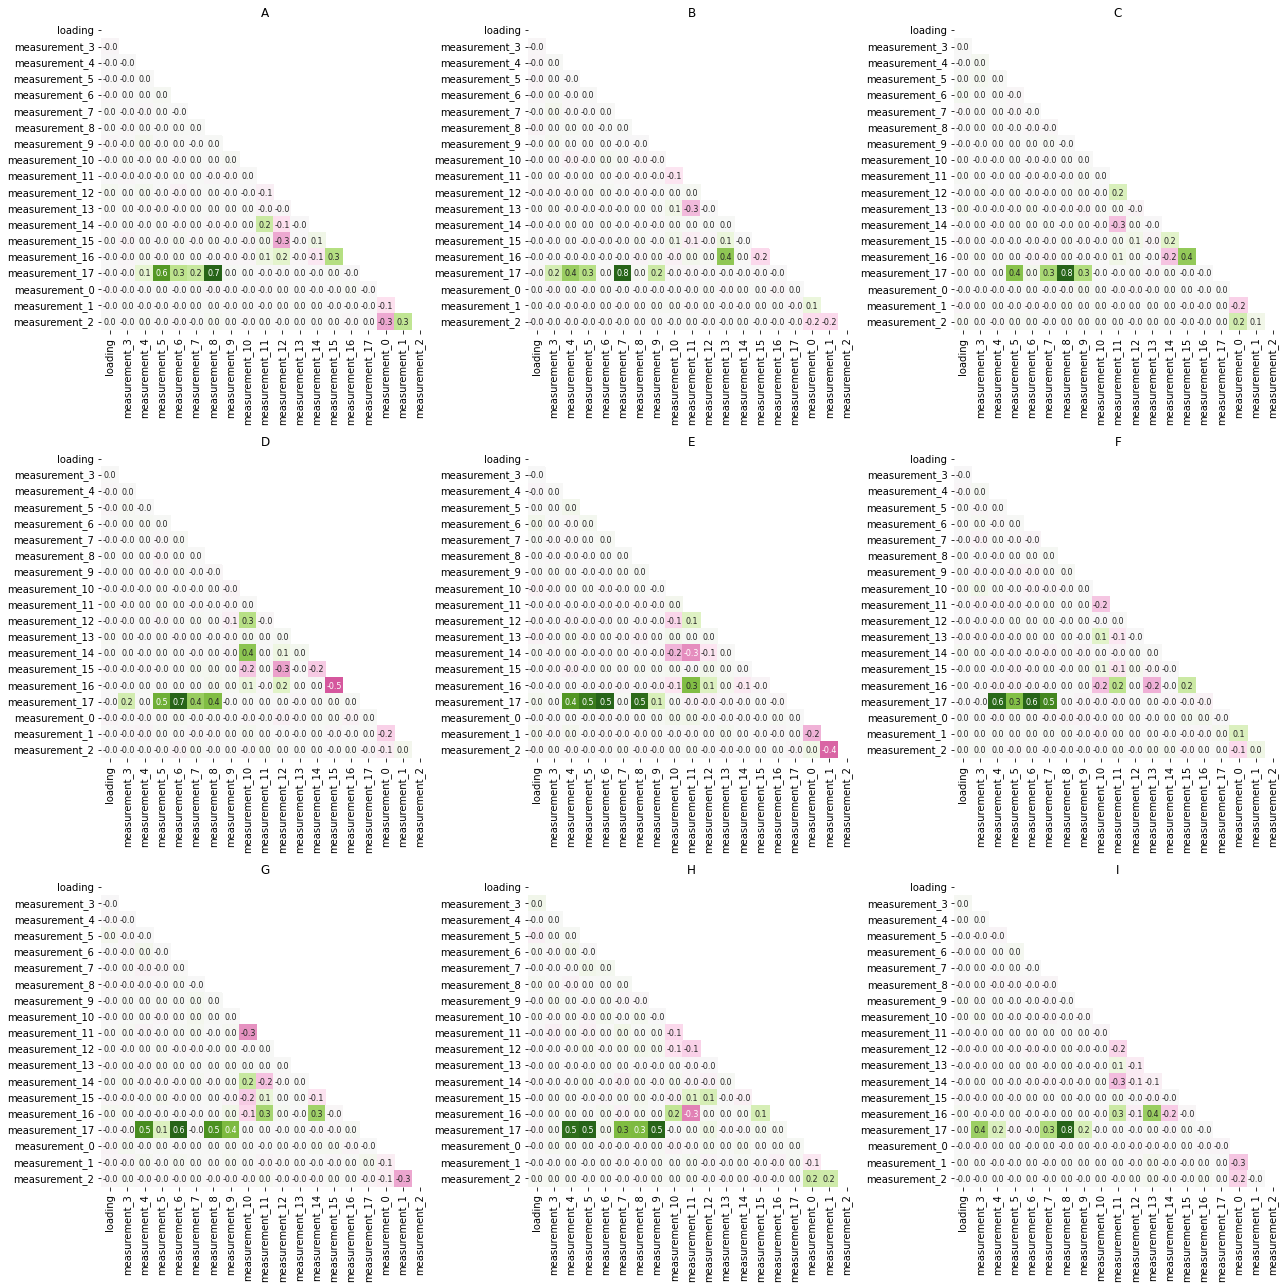

In [ ]:
both = pd.concat([train[test.columns], test])

plt.figure(figsize=(18, 18))                # Figure 크기 설정
grid = gridspec.GridSpec(3,3)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.3) # 서브플롯 간 여백 설정
mpl.rc('font', size = 10)

for idx, product in enumerate(np.unique(both.product_code)):
    ax = plt.subplot(grid[idx])
    corr = both[float_cols.to_list() + ['measurement_0', 'measurement_1', 'measurement_2']][both.product_code == product].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, linewidth=0.0, fmt='.1f', 
                annot=True, annot_kws={'size': 8}, 
                cmap='PiYG', center=0, ax=ax, cbar=False)
    ax.set_title(product)

plt.tight_layout(w_pad=0.5)
plt.show()

#feature engineering

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import itertools
from collections import defaultdict
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, HuberRegressor
from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.metrics import roc_auc_score
#from feature_engine.encoding import WoEEncoder
from scipy.stats import spearmanr, rankdata

In [ ]:
data = pd.concat([train, test])
#https://www.kaggle.com/code/takanashihumbert/tps-aug22-lb-0-59013
data['m3_missing'] = data['measurement_3'].isnull().astype(np.int8)
data['m5_missing'] = data['measurement_5'].isnull().astype(np.int8)
data['area'] = data['attribute_2'] * data['attribute_3']

#  HuberRegressor model을 통해서 상관관계가 강한 피처간의 관계를 학습시킨다.
# 특이치에 강한 선형모델(잔차가 epsilon보다 작다면 mae를 사용하고 epsilon보다 크다면 이상치라고 간주하고 잔차의 절댓값-epsilon를 손실함수로 사용한다.)
# https://towardsdatascience.com/regression-in-the-face-of-messy-outliers-try-huber-regressor-3a54ddc12516
fill_dict = {
    'A': ['measurement_5','measurement_6','measurement_8'],
    'B': ['measurement_4','measurement_5','measurement_7'],
    'C': ['measurement_5','measurement_7','measurement_8','measurement_9'],
    'D': ['measurement_5','measurement_6','measurement_7','measurement_8'],
    'E': ['measurement_4','measurement_5','measurement_6','measurement_8'],
    'F': ['measurement_4','measurement_5','measurement_6','measurement_7'],
    'G': ['measurement_4','measurement_6','measurement_8','measurement_9'],
    'H': ['measurement_4','measurement_5','measurement_7','measurement_8','measurement_9'],
    'I': ['measurement_3','measurement_7','measurement_8']
}

feature = [f for f in data.columns if f.startswith('measurement') or f=='loading']

# 1. measurement_17은 다른 몇몇의 measurement_n 피처들과 강한 상관관계를
# 2. measurement_17은 많은 결측치를 가진다.
# 따라서 measurement_17의 결측치를 target으로 두고 상관관계가 강한 measurement 피처로 measurement_17의 결측치 예측을 통해서 결측치를 채운다.

for code in data.product_code.unique():
    tmp = data[data.product_code==code]
    column = fill_dict[code]

    # [features]                   [target]
    # (measurement_n==결측치없음 & measurement_17==결측치없음)
    tmp_train = tmp[column+['measurement_17']].dropna()
    # (measurement_n==결측치없음 & measurement_17==결측치있음)
    tmp_test = tmp[(tmp[column].isnull().sum(axis=1)==0)&(tmp['measurement_17'].isnull())]

    model = HuberRegressor(epsilon=1.9)
    model.fit(tmp_train[column], tmp_train['measurement_17'])
    data.loc[(data.product_code==code)&(data[column].isnull().sum(axis=1)==0)&(data['measurement_17'].isnull()), 'measurement_17'] = model.predict(tmp_test[column])
    
    #KNNImputer로 measurement 피처들의 결측치 예측
    model2 = KNNImputer(n_neighbors=3, weights= 'distance')
    data.loc[data.product_code==code, feature] = model2.fit_transform(data.loc[data.product_code==code, feature])
    print(f"code {code} has been filled {len(tmp_test)} samples, KNN imputing finished")

code A has been filled 386 samples, KNN imputing finished
code B has been filled 418 samples, KNN imputing finished
code C has been filled 391 samples, KNN imputing finished
code D has been filled 398 samples, KNN imputing finished
code E has been filled 429 samples, KNN imputing finished
code F has been filled 420 samples, KNN imputing finished
code G has been filled 373 samples, KNN imputing finished
code H has been filled 361 samples, KNN imputing finished
code I has been filled 377 samples, KNN imputing finished


In [ ]:
data.isnull().sum()

product_code          0
loading               0
attribute_0           0
attribute_1           0
attribute_2           0
attribute_3           0
measurement_0         0
measurement_1         0
measurement_2         0
measurement_3         0
measurement_4         0
measurement_5         0
measurement_6         0
measurement_7         0
measurement_8         0
measurement_9         0
measurement_10        0
measurement_11        0
measurement_12        0
measurement_13        0
measurement_14        0
measurement_15        0
measurement_16        0
measurement_17        0
failure           20775
m3_missing            0
m5_missing            0
area                  0
dtype: int64

In [ ]:
data['measurement_avg'] = data[[f'measurement_{i}' for i in range(3, 17)]].mean(axis=1)

In [ ]:
def _scale(train_data, val_data, test_data, feats):
    scaler = StandardScaler()
    # scaler = PowerTransformer()
    
    scaled_train = scaler.fit_transform(train_data[feats])
    scaled_val = scaler.transform(val_data[feats])
    scaled_test = scaler.transform(test_data[feats])
    
    #back to dataframe
    new_train = train_data.copy()
    new_val = val_data.copy()
    new_test = test_data.copy()
    
    new_train[feats] = scaled_train
    new_val[feats] = scaled_val
    new_test[feats] = scaled_test
    
    assert len(train_data) == len(new_train)
    assert len(val_data) == len(new_val)
    assert len(test_data) == len(new_test)
    
    return new_train, new_val, new_test

In [ ]:
train = data[data.failure.notnull()]
test = data[data.failure.isnull()]
print(train.shape, test.shape)

groups = train.product_code
X = train.drop(['failure'], axis=1)
y = train['failure'].astype(int)
test = test.drop(['failure'], axis=1)

(26570, 29) (20775, 29)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47345 entries, 0 to 47344
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_code     47345 non-null  object 
 1   loading          47345 non-null  float32
 2   attribute_0      47345 non-null  object 
 3   attribute_1      47345 non-null  object 
 4   attribute_2      47345 non-null  int8   
 5   attribute_3      47345 non-null  int8   
 6   measurement_0    47345 non-null  float64
 7   measurement_1    47345 non-null  float64
 8   measurement_2    47345 non-null  float64
 9   measurement_3    47345 non-null  float32
 10  measurement_4    47345 non-null  float32
 11  measurement_5    47345 non-null  float32
 12  measurement_6    47345 non-null  float32
 13  measurement_7    47345 non-null  float32
 14  measurement_8    47345 non-null  float32
 15  measurement_9    47345 non-null  float32
 16  measurement_10   47345 non-null  float32
 17  measurement_

In [ ]:
!pip install feature-engine
from feature_engine.encoding import WoEEncoder
#WOE = In(% of non-events ➗ % of events)
# 이진피처를  그처 0,1이 아닌 위의 수식을 통해서 조금 더 의미있는 인코딩을 하게함
woe_encoder = WoEEncoder(variables=['attribute_0'])
woe_encoder.fit(X, y)
X = woe_encoder.transform(X)
test = woe_encoder.transform(test)

In [ ]:
x_train.columns

Index(['product_code', 'loading', 'attribute_0', 'attribute_1', 'attribute_2',
       'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2',
       'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6',
       'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14',
       'measurement_15', 'measurement_16', 'measurement_17', 'm3_missing',
       'm5_missing', 'area', 'measurement_avg'],
      dtype='object')

#모델선언, KFold

Fold: 1
FOLD:  1  ROC-AUC: 0.59858
Fold: 2
FOLD:  2  ROC-AUC: 0.59351
Fold: 3
FOLD:  3  ROC-AUC: 0.58074
Fold: 4
FOLD:  4  ROC-AUC: 0.59323
Fold: 5
FOLD:  5  ROC-AUC: 0.5875
Average auc = 0.59071
OOF auc = 0.5906


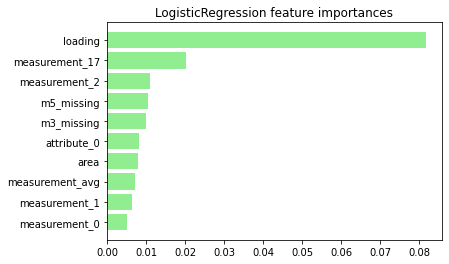

In [ ]:
select_feature = ['loading', 'attribute_0', 'measurement_17', 'measurement_0', 'measurement_1',
                  'measurement_2', 'area', 'm3_missing', 'm5_missing', 'measurement_avg']
#select_feature = x_train.columns                  
lr_oof = np.zeros(len(train))
lr_test = np.zeros(len(test))
lr_auc = 0
importance_list = []

#kf = GroupKFold(n_splits=5)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print("Fold:", fold_idx+1)
    x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    x_train, x_val, x_test = _scale(x_train, x_val, test, select_feature)
    
    model = LogisticRegression(max_iter=200, C=0.0001, penalty='l2', solver='newton-cg')
    model.fit(x_train[select_feature], y_train)
    importance_list.append(model.coef_.ravel())

    val_preds = model.predict_proba(x_val[select_feature])[:, 1]
    print("FOLD: ", fold_idx+1, " ROC-AUC:", round(roc_auc_score(y_val, val_preds), 5))
    lr_auc += roc_auc_score(y_val, val_preds) / 5
    lr_test += model.predict_proba(x_test[select_feature])[:, 1] / 5
    lr_oof[val_idx] = val_preds

print(f"Average auc = {round(lr_auc, 5)}")
print(f"OOF auc = {round(roc_auc_score(y, lr_oof), 5)}")

importance_df = pd.DataFrame(np.array(importance_list).T, index=x_train[select_feature].columns)
importance_df['mean'] = importance_df.mean(axis=1).abs()
importance_df['feature'] = x_train[select_feature].columns
importance_df = importance_df.sort_values('mean', ascending=False).reset_index().head(20)
plt.barh(importance_df.index, importance_df['mean'], color='lightgreen')
plt.gca().invert_yaxis()
plt.yticks(ticks=importance_df.index, labels=importance_df['feature'])
plt.title('LogisticRegression feature importances')
plt.show()

#submit

In [ ]:
sub['failure'] = lr_test
sub.to_csv("./submission.csv", index=False)